## 数据增强
增加一个已有的数据集，使得有更多的多样性

<class 'numpy.ndarray'>


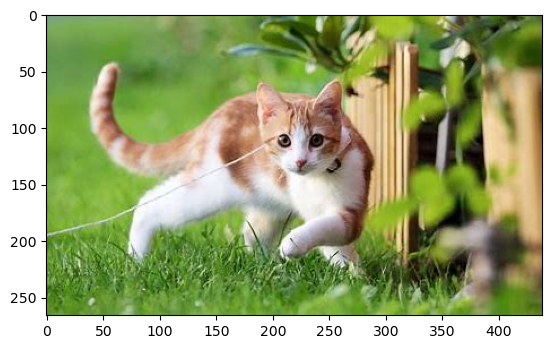

In [30]:
%matplotlib inline
import torch
import torchvision
from torch import nn

# 在Jupyter Notebook的单元格中运行以下命令来切换后端
%matplotlib inline
import matplotlib.pyplot as plt
# 你的图像显示代码
img = plt.imread('cat.png')
print(type(img))
plt.imshow(img)
# 显示图像，这将在Notebook中创建一个交互式图像
plt.show()


## 1.左右翻转

torch.Size([3, 266, 439])


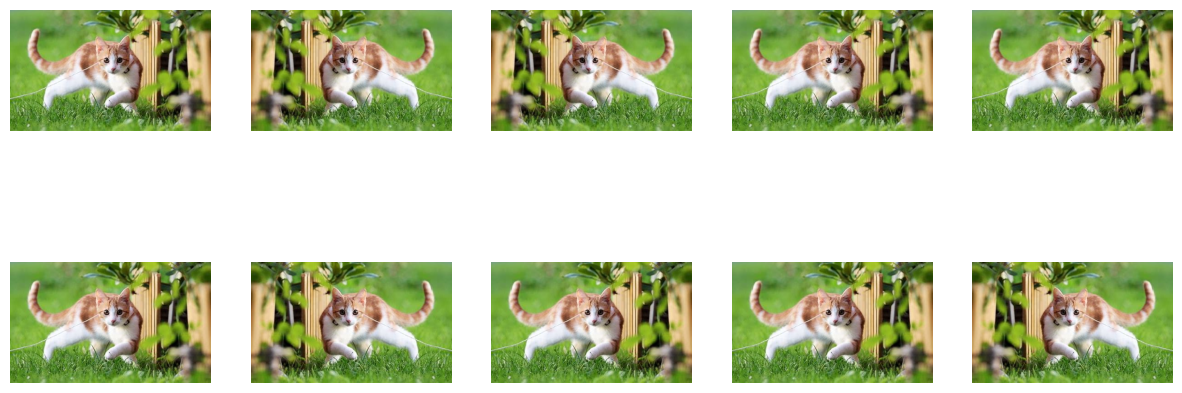

In [58]:
img_tensor = torchvision.transforms.ToTensor()(img)
print(img_tensor.shape)
transform = torchvision.transforms.RandomHorizontalFlip()
# 创建一个2x5的子图网格
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):
    row = i // 5
    col = i % 5
    img_tensor_copy = transform(img_tensor)
    # 创建副本避免每次都改变原始张量
    img_tensor_copy = img_tensor_copy.permute(1, 2, 0)
    axs[row, col].imshow(img_tensor_copy)
    axs[row, col].axis('off')
plt.show()

## 2.上下翻转

torch.Size([3, 266, 439])


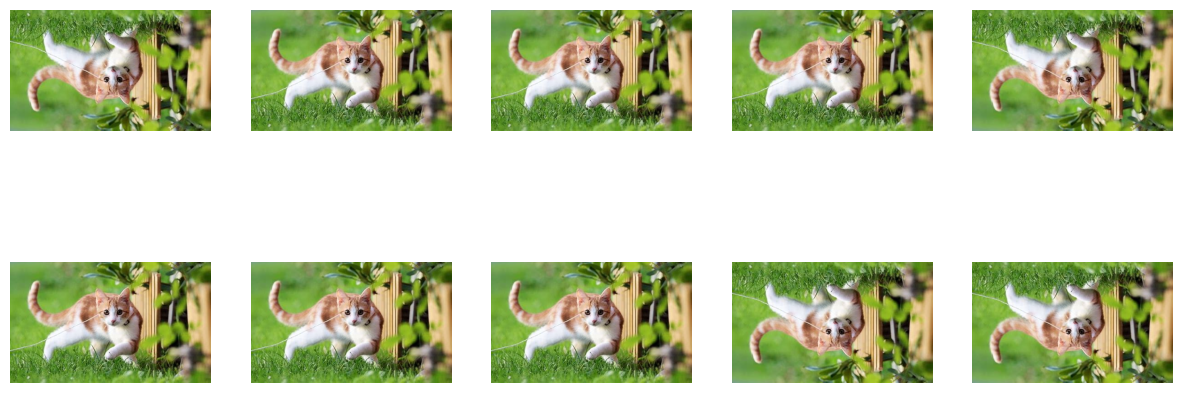

In [57]:
img_tensor = torchvision.transforms.ToTensor()(img)
print(img_tensor.shape)
transform = torchvision.transforms.RandomVerticalFlip()
# 创建一个2x5的子图网格
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):
    row = i // 5
    col = i % 5
    img_tensor_copy = transform(img_tensor)
    # 创建副本避免每次都改变原始张量
    img_tensor_copy = img_tensor_copy.permute(1, 2, 0)
    axs[row, col].imshow(img_tensor_copy)
    axs[row, col].axis('off')
plt.show()

## 3.随机裁剪

torch.Size([3, 266, 439])


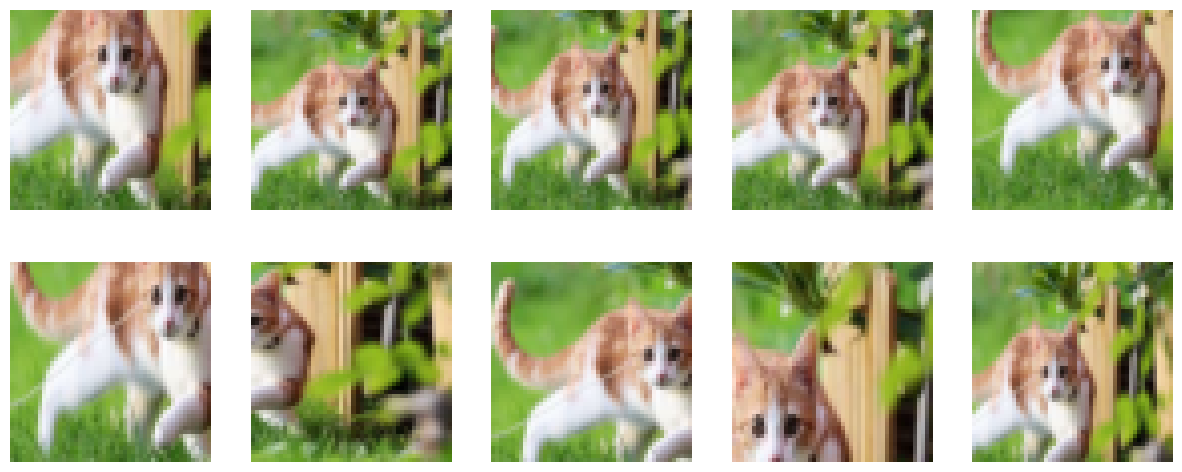

In [68]:
img_tensor = torchvision.transforms.ToTensor()(img)
print(img_tensor.shape)
# size: 裁剪后的图像尺寸
# scale: 缩放范围,默认情况下，这个范围是 (0.08, 1.0)，意味着裁剪区域的面积至少是原图的8%
# ratio: 宽高比例,默认值是 (3/4, 4/3)，这意味着裁剪区域的宽高比将在0.75到1.33之间变化。
transform = torchvision.transforms.RandomResizedCrop(
    size=(50,50),
    scale=(0.1, 1.0),
    ratio=(0.5, 2)
)
# 创建一个2x5的子图网格
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):
    row = i // 5
    col = i % 5
    # 创建副本避免每次都改变原始张量
    img_tensor_copy = transform(img_tensor)
    img_tensor_copy = img_tensor_copy.permute(1, 2, 0)
    axs[row, col].imshow(img_tensor_copy)
    axs[row, col].axis('off')
plt.show()

## 4.随机更改图像的亮度

torch.Size([3, 266, 439])


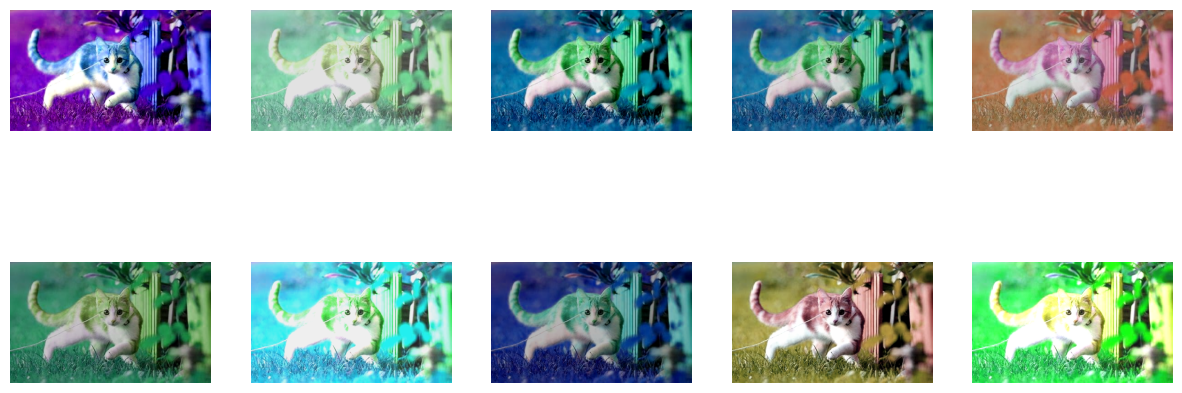

In [70]:
img_tensor = torchvision.transforms.ToTensor()(img)
print(img_tensor.shape)
transform = torchvision.transforms.ColorJitter(
    brightness=0.5, # 亮度  0.5表示在原图像的亮度上改变50%
    contrast=0.5, # 对比度
    saturation=0.5, # 饱和度
    hue=0.5 # 色调
)
# 创建一个2x5的子图网格
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):
    row = i // 5
    col = i % 5
    # 创建副本避免每次都改变原始张量
    img_tensor_copy = transform(img_tensor)
    img_tensor_copy = img_tensor_copy.permute(1, 2, 0)
    axs[row, col].imshow(img_tensor_copy)
    axs[row, col].axis('off')
plt.show()

## 5.结合多种图像的增广方法

torch.Size([3, 266, 439])


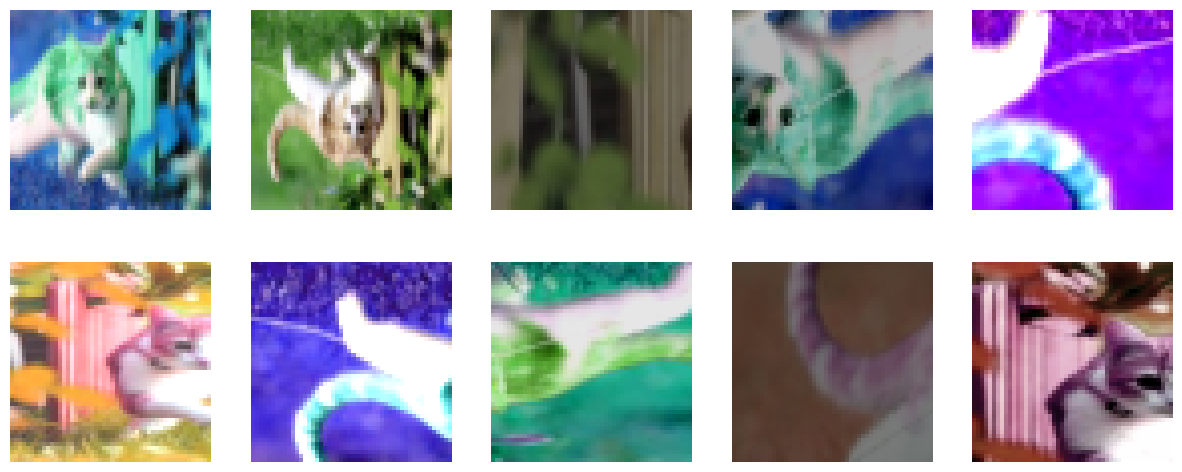

In [75]:
img_tensor = torchvision.transforms.ToTensor()(img)
print(img_tensor.shape)
# size: 裁剪后的图像尺寸
# scale: 缩放范围,默认情况下，这个范围是 (0.08, 1.0)，意味着裁剪区域的面积至少是原图的8%
# ratio: 宽高比例,默认值是 (3/4, 4/3)，这意味着裁剪区域的宽高比将在0.75到1.33之间变化。
transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomVerticalFlip(),
    torchvision.transforms.RandomResizedCrop(
        size=(50,50),
        scale=(0.1, 1.0),
        ratio=(0.5, 2)
    ),
    torchvision.transforms.ColorJitter(
        brightness=0.5, # 亮度  0.5表示在原图像的亮度上改变50%
        contrast=0.5, # 对比度
        saturation=0.5, # 饱和度
        hue=0.5 # 色调
    )
])
# 创建一个2x5的子图网格
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):
    row = i // 5
    col = i % 5
    # 创建副本避免每次都改变原始张量
    img_tensor_copy = transform(img_tensor)
    img_tensor_copy = img_tensor_copy.permute(1, 2, 0)
    axs[row, col].imshow(img_tensor_copy)
    axs[row, col].axis('off')
plt.show()